In [16]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [1]:
#cluster analysis is used to form groups or clusters of similar records based on several measurements made on these records.  Thek ey idea is to characterize the clusters in ways that would be useful for the aims of the analysis.  T

In [2]:
#One popular use for cluster analysis in marketing is for market segmentation: customers are segmented based on demographic and transaction history


In [3]:
#I will be using cluster analysis to cluster different types of utilites and do cost analysis for each utility from 22 different companies

In [63]:
utilities_df = pd.read_csv(r'Making_Data_Decisions_Files/dmba-datasets/dmba/Utilities.csv')

In [64]:
#set row names to the utilites column
utilities_df.set_index('Company', inplace = True)


In [65]:
#Convert integer data to float data 
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

In [66]:
#Compute Euclidian distance
d = pairwise.pairwise_distances(utilities_df, metric = 'euclidean')

In [67]:
pd.DataFrame(d, columns=utilities_df.index,
             index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


<Axes: xlabel='Fuel_Cost', ylabel='Sales'>

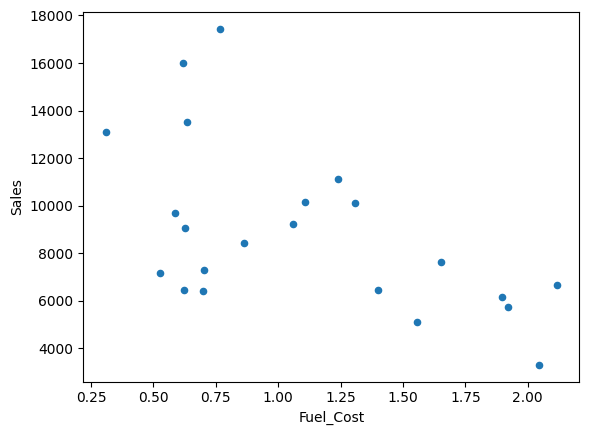

In [68]:
utilities_df.plot.scatter(x='Fuel_Cost',y='Sales')

In [69]:
utilities_df.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044


In [70]:
#Normalizing data and computing distance
#sci-kit learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis = 0)

In [71]:
#pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()
utilities_df_norm.head()

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.293158,-0.684639,-0.417122,-0.577715,-0.526228,0.045903,-0.714629,-0.853675
Boston,-1.214511,-0.194454,0.821002,0.206836,-0.333812,-1.077764,0.792048,0.813297
Central,1.712141,2.078224,-1.339646,-0.891536,0.051019,0.083931,-0.714629,-0.080431
Commonwealth,-0.509947,0.206607,-0.004414,-0.219063,-0.943128,-0.701706,1.328020,-0.724202
NY,2.037324,-0.862888,0.578233,-1.295019,-0.718643,-1.581428,0.214389,1.692638


In [72]:
#Now copmute normalized distance based on sales and fuel cost
utilities_df_norm[['Sales', 'Fuel_Cost']]
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']], metric='euclidean')

In [73]:
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,1.490116e-08,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638e+00,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,5.214913e-01,2.761745e+00,1.252350
Boston,2.010329e+00,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654e+00,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255e+00,1.100595e+00,1.479261
Central,7.741795e-01,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777e+00,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,8.389668e-01,2.034824e+00,0.510365
Commonwealth,7.587375e-01,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230e+00,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,2.434079e-01,2.547116e+00,1.502093
NY,3.021907e+00,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561e+00,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786e+00,9.525069e-01,2.328691
Florida,1.244422e+00,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123e+00,1.025663,1.722510,...,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417e+00,2.016493e+00,0.313847
Hawaiian,1.885248e+00,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189e+00,1.436822,1.880361,...,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256e+00,8.799342e-01,0.929414
Idaho,1.265638e+00,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,2.980232e-08,1.650417,1.950296,...,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813e+00,3.720421e+00,1.980715
Kentucky,4.612918e-01,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417e+00,0.000000,0.697674,...,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,4.267801e-01,2.308613e+00,0.929141


In [74]:
#Running hierarchical clustering and generating a dendrogram
#set arguments in linkage() to 'single', 'complete', 'average', 'weighted', 'centroid', 'median', and 'ward'
Z = linkage(utilities_df_norm, method = 'single')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [110.0, 110.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [175.0, 175.0, 200.0, 200.0],
  [160.0, 160.0, 187.5, 187.5],
  [125.0, 125.0, 173.75, 173.75],
  [54.375, 54.375, 149.375, 149.375],
  [35.0, 35.0, 101.875, 101.875],
  [12.5, 12.5, 68.4375, 68.4375]],
 'dcoord': [[0.0,
   np.float64(2.2014571837316304),
   np.float64(2.2014571837316304),
   0.0],
  [0.0,
   np.float64(3.4462747386146946),
   np.float64(3.4462747386146946),
   np.float64(2.2014571837316304)],
  [0.0, np.float64(1.3841237675943323), np.float64(1.3841237675943323), 0.0],
  [0.0,
   np.float64(2.1677254242040145),

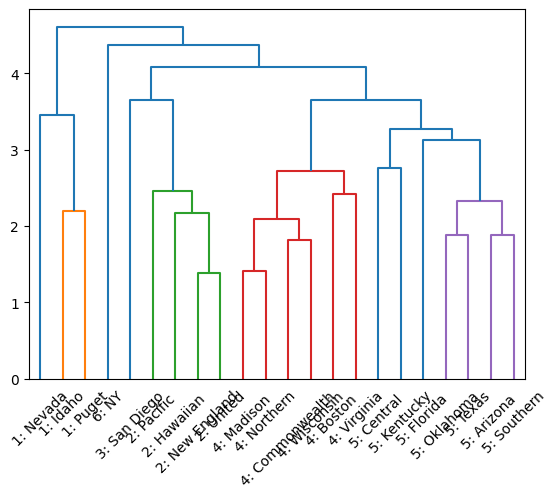

In [87]:
dendrogram(Z, labels= utilities_df_norm.index, color_threshold=2.75)

In [88]:
Z = linkage(utilities_df_norm, method='average')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [110.0, 110.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [175.0, 175.0, 200.0, 200.0],
  [160.0, 160.0, 187.5, 187.5],
  [125.0, 125.0, 173.75, 173.75],
  [54.375, 54.375, 149.375, 149.375],
  [35.0, 35.0, 101.875, 101.875],
  [12.5, 12.5, 68.4375, 68.4375]],
 'dcoord': [[0.0,
   np.float64(2.2014571837316304),
   np.float64(2.2014571837316304),
   0.0],
  [0.0,
   np.float64(3.4462747386146946),
   np.float64(3.4462747386146946),
   np.float64(2.2014571837316304)],
  [0.0, np.float64(1.3841237675943323), np.float64(1.3841237675943323), 0.0],
  [0.0,
   np.float64(2.1677254242040145),

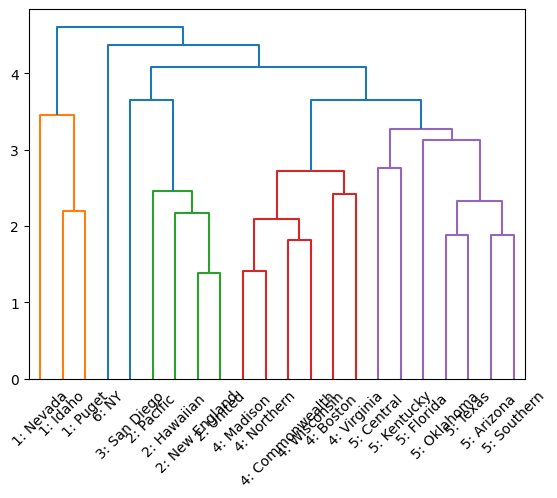

In [89]:
dendrogram(Z, labels= utilities_df_norm.index, color_threshold=3.6)

## Compute cluster membership by cutting the dendrogram
memb = fcluster(linkage(utilities_df_norm, method='single'), 6, criterion = 'maxclust')

In [79]:
memb = pd.Series(memb, index=utilities_df_norm.index)

In [80]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


In [81]:
#For average linkage
memb = fcluster(linkage(utilities_df_norm, method='average'), 6, criterion = 'maxclust')

In [82]:
memb = pd.Series(memb, index=utilities_df_norm.index)

In [83]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


In [84]:
#Heatmap
utilities_df_norm.index = ['{}: {}'.format(cluster,state)
                           for cluster, state in zip(memb, utilities_df_norm.index)]

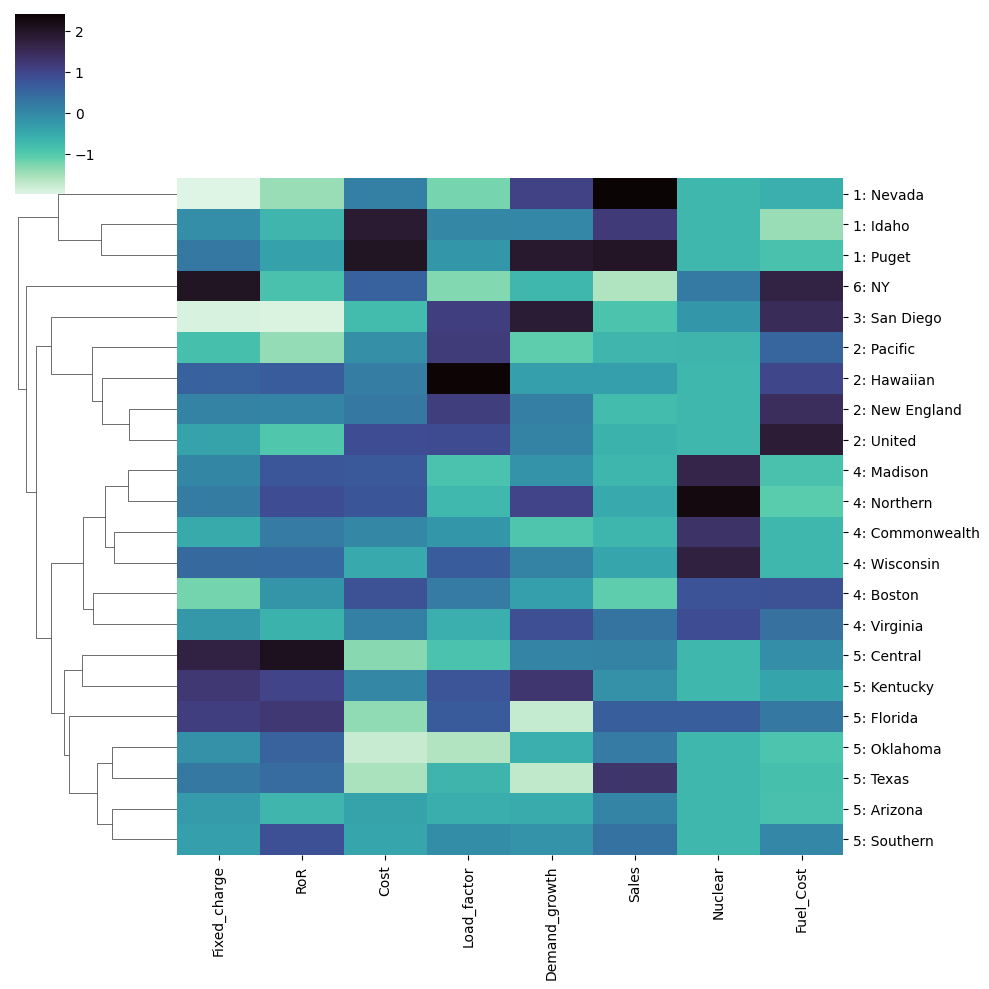

In [86]:
sns.clustermap(utilities_df_norm, method='average', col_cluster=False, cmap='mako_r')

In [90]:
#K-means clustering

In [94]:
utilities_df = pd.read_csv(r'Making_Data_Decisions_Files/dmba-datasets/dmba/Utilities.csv')

In [95]:
utilities_df.set_index('Company', inplace=True)

In [96]:
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

In [97]:
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)


In [98]:
kmeans = KMeans(n_clusters = 6, random_state= 0).fit(utilities_df_norm)

In [101]:
#cluster membership
memb = pd.Series(kmeans.labels_, index = utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Commonwealth, Madison , Northern, Wisconsin, Virginia
1 :  Pacific 
2 :  Arizona , Central , Florida , Oklahoma, Southern, Texas
3 :  Idaho, Nevada, Puget
4 :  Kentucky
5 :  Boston , NY, Hawaiian , New England, San Diego, United


In [102]:
#calculate the distances of each data point to the cluster centers
distances = kmeans.transform(utilities_df_norm)

In [105]:
#find the closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2

In [108]:
#combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=utilities_df_norm.index)

In [110]:
for cluster, data in df.groupby('cluster'):
    count=len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (5 members): 10.66 within cluster 
Cluster 1 (1 members): 0.00 within cluster 
Cluster 2 (6 members): 20.28 within cluster 
Cluster 3 (3 members): 9.99 within cluster 
Cluster 4 (1 members): 0.00 within cluster 
Cluster 5 (6 members): 32.27 within cluster 


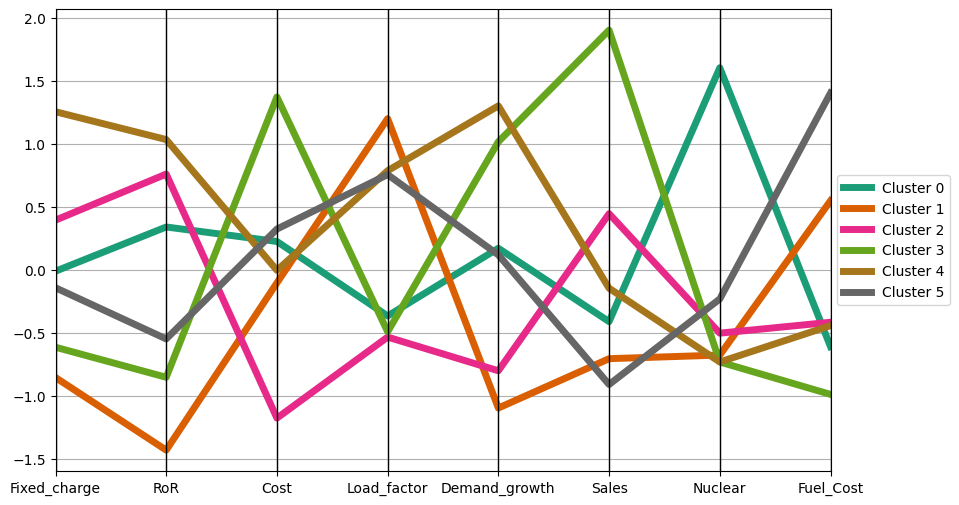

In [121]:
#Plotting profile plot of centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, 
                         columns=utilities_df_norm.columns)
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
parallel_coordinates(centroids, class_column = 'cluster',
                     colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

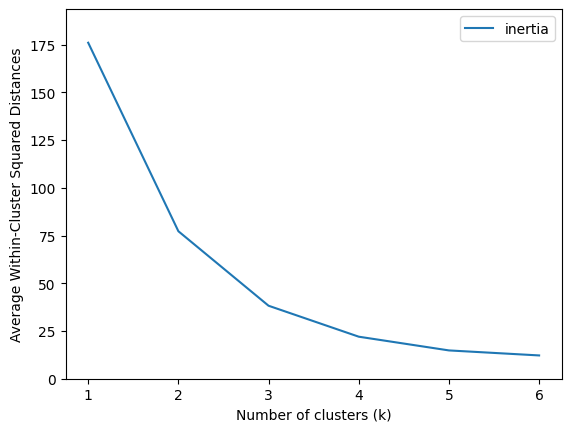

In [126]:
#comparing different choices of k in terms of overall average within-cluster distance
inertia = []
for n_clusters in range(1,7):
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_/n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax= inertias.plot(x='n_clusters', y ='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0,1.1 * inertias.inertia.max()))
plt.show()